In [8]:
!pip install -U imbalanced-learn

In [9]:
#Importação de pacotes
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', None)

In [10]:
#Importando os dados da minha máquina
dados= pd.read_csv(r'C:\Users\iurih\OneDrive\Área de Trabalho\ARQUIVOS DE PARTICIPAÇÃO EM PROCESSOS SELETIVOS\case_datarisk (1)\case_datarisk\treino.csv')
teste= pd.read_csv(r'C:\Users\iurih\OneDrive\Área de Trabalho\ARQUIVOS DE PARTICIPAÇÃO EM PROCESSOS SELETIVOS\case_datarisk (1)\case_datarisk\teste.csv')

In [11]:
#Modelo prediditivo, visando avaliar probabilidade de inadimplência de uma determina pessoa pegar crédito
#Construir qualquer modelo preditivo utilizando o arquivo treino.csv.
# Utilize este modelo para gerar as previsões na base teste.csv, inserindo uma nova coluna
# na tabela de dados do arquivo teste.csv que contenha as previsões e nomeie esta coluna
# com o nome "inadimplente". Espera-se que não seja necessário mais que um dia para a
# resolução deste problema.

# Analise Exploratória

In [12]:
# Tamanho total de 110000 e 11 variaveis
dados.shape

(110000, 11)

In [13]:
#Visão geral ds dados
dados.head()

inadimplente  util_linhas_inseguras  idade  vezes_passou_de_30_59_dias  \
0             1               0.766127     45                           2   
1             0               0.957151     40                           0   
2             0               0.658180     38                           1   
3             0               0.233810     30                           0   
4             0               0.907239     49                           1   

   razao_debito  salario_mensal  numero_linhas_crdto_aberto  \
0      0.802982          9120.0                          13   
1      0.121876          2600.0                           4   
2      0.085113          3042.0                           2   
3      0.036050          3300.0                           5   
4      0.024926         63588.0                           7   

   numero_vezes_passou_90_dias  numero_emprestimos_imobiliarios  \
0                            0                                6   
1                            0                                0   
2                            1                                0   
3                            0                                0   
4                            0                                1   

   numero_de_vezes_que_passou_60_89_dias  numero_de_dependentes  
0                                      0                    2.0  
1                                      0                    1.0  
2                                      0                    0.0  
3                                      0                    0.0  
4                                      0                    0.0

In [14]:
#Salario mensal e numero de dependentes possuem valores vazios
dados.isnull().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

In [15]:
#Tipo das variaveis
dados.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [16]:
#Valores únicos de cada variavel, nesse caso não temos
valores_unicos = []
for i in dados.columns[0:11].tolist():
    print(i,':', len(dados[i].astype(str).value_counts()))
    valores_unicos.append(len(dados[i].astype(str).value_counts()))


inadimplente : 2
util_linhas_inseguras : 92671
idade : 86
vezes_passou_de_30_59_dias : 15
razao_debito : 86002
salario_mensal : 12229
numero_linhas_crdto_aberto : 57
numero_vezes_passou_90_dias : 18
numero_emprestimos_imobiliarios : 28
numero_de_vezes_que_passou_60_89_dias : 13
numero_de_dependentes : 13


In [17]:
#Visualizando algumas medidas estatisticas 
dados.describe()

inadimplente  util_linhas_inseguras          idade  \
count  110000.000000          110000.000000  110000.000000   
mean        0.066645               5.929979      52.255636   
std         0.249408             252.301965      14.768241   
min         0.000000               0.000000       0.000000   
25%         0.000000               0.030054      41.000000   
50%         0.000000               0.155936      52.000000   
75%         0.000000               0.562806      63.000000   
max         1.000000           50708.000000     109.000000   

       vezes_passou_de_30_59_dias   razao_debito  salario_mensal  \
count               110000.000000  110000.000000    8.823700e+04   
mean                     0.424055     354.823589    6.637411e+03   
std                      4.240780    2074.140421    1.338395e+04   
min                      0.000000       0.000000    0.000000e+00   
25%                      0.000000       0.175016    3.400000e+03   
50%                      0.000000       0.366682    5.400000e+03   
75%                      0.000000       0.866874    8.225000e+03   
max                     98.000000  329664.000000    3.008750e+06   

       numero_linhas_crdto_aberto  numero_vezes_passou_90_dias  \
count               110000.000000                110000.000000   
mean                     8.445573                     0.269955   
std                      5.139026                     4.217326   
min                      0.000000                     0.000000   
25%                      5.000000                     0.000000   
50%                      8.000000                     0.000000   
75%                     11.000000                     0.000000   
max                     58.000000                    98.000000   

       numero_emprestimos_imobiliarios  numero_de_vezes_que_passou_60_89_dias  \
count                    110000.000000                          110000.000000   
mean                          1.019891                               0.243891   
std                           1.135989                               4.204137   
min                           0.000000                               0.000000   
25%                           0.000000                               0.000000   
50%                           1.000000                               0.000000   
75%                           2.000000                               0.000000   
max                          54.000000                              98.000000   

       numero_de_dependentes  
count          107122.000000  
mean                0.757482  
std                 1.114670  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                20.000000

In [18]:
#A variavel balanceada no pré processamento 
dados.groupby(['inadimplente']).size()

inadimplente
0    102669
1      7331
dtype: int64

In [19]:
dados.groupby(['salario_mensal']).size()

salario_mensal
0.0          1216
1.0           433
2.0             6
4.0             1
5.0             2
9.0             1
10.0            1
11.0            1
21.0            1
25.0            1
27.0            2
34.0            1
40.0            2
42.0            1
50.0            4
55.0            1
56.0            1
69.0            1
70.0            2
72.0            1
75.0            1
84.0            1
100.0          16
101.0           1
105.0           1
107.0           1
115.0           1
125.0           1
126.0           1
135.0           1
140.0           2
147.0           1
150.0           3
151.0           2
160.0           1
166.0           1
167.0           1
170.0           1
179.0           2
180.0           1
189.0           1
197.0           1
200.0          32
201.0           3
220.0           1
221.0           1
225.0           1
228.0           1
236.0           1
237.0           1
240.0           2
242.0           1
248.0           1
249.0           1
250.0        

In [20]:
dados.groupby(['idade']).size()

idade
0         1
21      142
22      324
23      469
24      616
25      704
26      874
27      969
28     1152
29     1296
30     1385
31     1475
32     1504
33     1681
34     1600
35     1647
36     1733
37     1837
38     1926
39     2242
40     2282
41     2265
42     2268
43     2364
44     2449
45     2525
46     2759
47     2718
48     2794
49     2788
50     2709
51     2665
52     2642
53     2660
54     2640
55     2526
56     2602
57     2485
58     2555
59     2418
60     2350
61     2585
62     2599
63     2705
64     2252
65     1906
66     1835
67     1811
68     1617
69     1450
70     1314
71     1208
72     1218
73     1127
74     1062
75      906
76      873
77      794
78      758
79      723
80      612
81      592
82      471
83      371
84      347
85      358
86      306
87      253
88      219
89      197
90      136
91      108
92       66
93       71
94       30
95       34
96       10
97       11
98        5
99        9
101       2
102       3
103       

In [21]:
dados.groupby(['razao_debito']).size()

razao_debito
0.000000         3030
0.000026            1
0.000037            1
0.000039            1
0.000075            1
0.000080            1
0.000086            1
0.000091            1
0.000092            1
0.000095            1
0.000095            1
0.000095            1
0.000095            4
0.000096            1
0.000099            1
0.000102            1
0.000105            1
0.000112            1
0.000112            1
0.000114            1
0.000120            1
0.000122            1
0.000123            1
0.000123            1
0.000125            1
0.000128            1
0.000129            1
0.000129            1
0.000133            1
0.000133            1
0.000134            1
0.000134            1
0.000135            1
0.000136            1
0.000138            1
0.000141            2
0.000143            1
0.000147            1
0.000148            1
0.000149            1
0.000149            1
0.000150            1
0.000150            1
0.000151            1
0.000153           

In [22]:
dados.groupby(['numero_linhas_crdto_aberto']).size()

numero_linhas_crdto_aberto
0     1419
1     3252
2     4915
3     6652
4     8512
5     9521
6     9988
7     9675
8     9171
9     8240
10    7095
11    6107
12    5122
13    4163
14    3373
15    2661
16    2173
17    1738
18    1428
19    1037
20     847
21     649
22     522
23     394
24     313
25     221
26     164
27     138
28     111
29      91
30      62
31      58
32      37
33      31
34      21
35      13
36      17
37       5
38      11
39       3
40       8
41       3
42       4
43       4
44       2
45       5
46       3
47       1
48       5
49       2
50       1
51       2
52       2
54       4
56       2
57       1
58       1
dtype: int64

In [23]:
dados.groupby(['util_linhas_inseguras']).size()

util_linhas_inseguras
0.000000        7983
0.000010           1
0.000015           1
0.000016           1
0.000016           1
0.000019           1
0.000021           1
0.000022           1
0.000024           1
0.000027           1
0.000028           1
0.000028           1
0.000032           1
0.000033           1
0.000033           1
0.000033           2
0.000034           1
0.000034           1
0.000034           1
0.000034           1
0.000035           1
0.000037           1
0.000038           1
0.000039           1
0.000040           1
0.000042           1
0.000043           1
0.000043           1
0.000044           1
0.000044           1
0.000046           1
0.000046           1
0.000048           1
0.000050           1
0.000051           1
0.000051           1
0.000052           1
0.000054           1
0.000054           1
0.000057           1
0.000057           1
0.000058           1
0.000058           1
0.000059           1
0.000059           1
0.000060           1
0.000062    

In [24]:
dados.groupby(['numero_linhas_crdto_aberto']).size()

numero_linhas_crdto_aberto
0     1419
1     3252
2     4915
3     6652
4     8512
5     9521
6     9988
7     9675
8     9171
9     8240
10    7095
11    6107
12    5122
13    4163
14    3373
15    2661
16    2173
17    1738
18    1428
19    1037
20     847
21     649
22     522
23     394
24     313
25     221
26     164
27     138
28     111
29      91
30      62
31      58
32      37
33      31
34      21
35      13
36      17
37       5
38      11
39       3
40       8
41       3
42       4
43       4
44       2
45       5
46       3
47       1
48       5
49       2
50       1
51       2
52       2
54       4
56       2
57       1
58       1
dtype: int64

# Tratamento de dados

In [25]:
#Nota-se que existe uma quantidade grande de dados faltantes, porém não ultrapassa 20%
#Nesse caso o recomendado é colocar a média ou a mediana nos valores faltantes
percentual_missing = dados.isnull().sum() * 100/ len(dados)
percentual_missing

inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
salario_mensal                           19.784545
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
numero_de_dependentes                     2.616364
dtype: float64

In [26]:
dados['salario_mensal'].fillna(dados['salario_mensal'].mean(),inplace=True)
dados['numero_de_dependentes'].fillna(int(dados['numero_de_dependentes'].mean()),inplace=True)

In [27]:
#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categorias para facilitar, nesse caso vamos criar faixas salariais
bins =[-100,2000,5000,10000,20000,50000,100000,300000,500000,1000000,90000000]
labels=['Até 2000', 'De 2001 Até 5000','De 5001 Até 10000','De 10001 Até 20000','De 20001 Até 50000','De 50001 Até 100000','De 100001 Até 300000','De 300001 Até 500000','De 500000 Até 1000000','Mais de 1000000']
dados['Faixa_Salarial'] = pd.cut(dados['salario_mensal'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_Salarial)

De 5001 Até 10000        55487
De 2001 Até 5000         32275
De 10001 Até 20000       11935
Até 2000                  8777
De 20001 Até 50000        1309
De 50001 Até 100000        167
De 100001 Até 300000        41
De 500000 Até 1000000        4
De 300001 Até 500000         3
Mais de 1000000              2
Name: Faixa_Salarial, dtype: int64

In [28]:
#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar razão
bins =[-100,0.3,0.5,1,dados['razao_debito'].max()]
labels= ['Até 0.3','De 0.3 Até 0.5', 'De 0.5 Até 1','Maior que 1']
dados['Faixa_razao'] = pd.cut(dados['razao_debito'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_razao)

Até 0.3           45824
Maior que 1       25745
De 0.3 Até 0.5    22957
De 0.5 Até 1      15474
Name: Faixa_razao, dtype: int64

In [29]:
#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,0.3,0.5,1,dados['util_linhas_inseguras'].max()]
labels= ['Até 0.3','De 0.31 Até 0.5', 'De 0.51 Até 1','Maior que 1']
dados['Faixa_linhas_inseguras'] = pd.cut(dados['util_linhas_inseguras'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_linhas_inseguras)

Até 0.3            67985
De 0.51 Até 1      27922
De 0.31 Até 0.5    11641
Maior que 1         2452
Name: Faixa_linhas_inseguras, dtype: int64

In [30]:
#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,20,40,60,80,dados['idade'].max()]
labels= ['Até 20','De 21 Até 40', 'De 41 Até 60','De 61 a 80','Maior que 80']
dados['Faixa_Idade'] = pd.cut(dados['idade'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_Idade)

De 41 Até 60    51182
De 61 a 80      29355
De 21 Até 40    25858
Maior que 80     3604
Até 20              1
Name: Faixa_Idade, dtype: int64

In [31]:
#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,5,10,20,30,dados['numero_linhas_crdto_aberto'].max()]
labels= ['Até 5','De 6 Até 10', 'De 11 Até 20','De 21 a 30','Maior que 30']
dados['Faixa_Linhas_abertas'] = pd.cut(dados['numero_linhas_crdto_aberto'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_Linhas_abertas)

De 6 Até 10     44169
Até 5           34271
De 11 Até 20    28649
De 21 a 30       2665
Maior que 30      246
Name: Faixa_Linhas_abertas, dtype: int64

In [32]:
#Vamos agora selecionar somente as colunas que desejo utilizar no modelo preditivo

colunas = ['inadimplente','Faixa_Salarial','Faixa_razao',
           'Faixa_linhas_inseguras','Faixa_Idade',
          'Faixa_Linhas_abertas','numero_de_dependentes',
           'numero_de_vezes_que_passou_60_89_dias','numero_vezes_passou_90_dias',
          'vezes_passou_de_30_59_dias','numero_emprestimos_imobiliarios']
df_dados=pd.DataFrame(dados, columns=colunas)

In [33]:
df_dados.shape

(110000, 11)

In [34]:
df_dados.head()

inadimplente       Faixa_Salarial   Faixa_razao Faixa_linhas_inseguras  \
0             1    De 5001 Até 10000  De 0.5 Até 1          De 0.51 Até 1   
1             0     De 2001 Até 5000       Até 0.3          De 0.51 Até 1   
2             0     De 2001 Até 5000       Até 0.3          De 0.51 Até 1   
3             0     De 2001 Até 5000       Até 0.3                Até 0.3   
4             0  De 50001 Até 100000       Até 0.3          De 0.51 Até 1   

    Faixa_Idade Faixa_Linhas_abertas  numero_de_dependentes  \
0  De 41 Até 60         De 11 Até 20                    2.0   
1  De 21 Até 40                Até 5                    1.0   
2  De 21 Até 40                Até 5                    0.0   
3  De 21 Até 40                Até 5                    0.0   
4  De 41 Até 60          De 6 Até 10                    0.0   

   numero_de_vezes_que_passou_60_89_dias  numero_vezes_passou_90_dias  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            1   
3                                      0                            0   
4                                      0                            0   

   vezes_passou_de_30_59_dias  numero_emprestimos_imobiliarios  
0                           2                                6  
1                           0                                0  
2                           1                                0  
3                           0                                0  
4                           1                                1

In [35]:
df_dados.isnull().sum()

inadimplente                             0
Faixa_Salarial                           0
Faixa_razao                              0
Faixa_linhas_inseguras                   0
Faixa_Idade                              0
Faixa_Linhas_abertas                     0
numero_de_dependentes                    0
numero_de_vezes_que_passou_60_89_dias    0
numero_vezes_passou_90_dias              0
vezes_passou_de_30_59_dias               0
numero_emprestimos_imobiliarios          0
dtype: int64

In [36]:
df_dados.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   inadimplente                           110000 non-null  int64   
 1   Faixa_Salarial                         110000 non-null  category
 2   Faixa_razao                            110000 non-null  category
 3   Faixa_linhas_inseguras                 110000 non-null  category
 4   Faixa_Idade                            110000 non-null  category
 5   Faixa_Linhas_abertas                   110000 non-null  category
 6   numero_de_dependentes                  110000 non-null  float64 
 7   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64   
 8   numero_vezes_passou_90_dias            110000 non-null  int64   
 9   vezes_passou_de_30_59_dias             110000 non-null  int64   
 10  numero_emprestimos_imobiliarios        11000

# Analise Exploratória - Variáveis Categóricas

<AxesSubplot:title={'center':'Inadimplente'}>

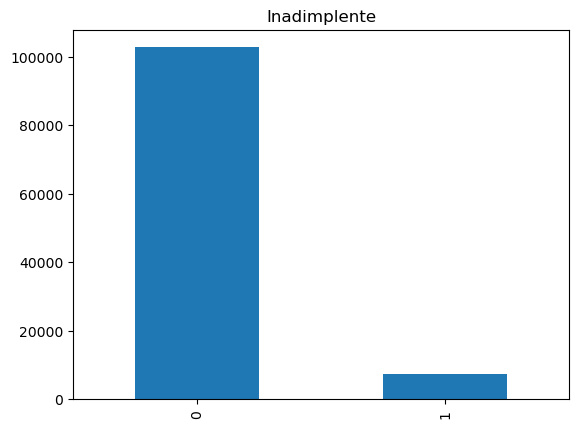

In [37]:
df_dados.inadimplente.value_counts().plot(kind='bar',title='Inadimplente')

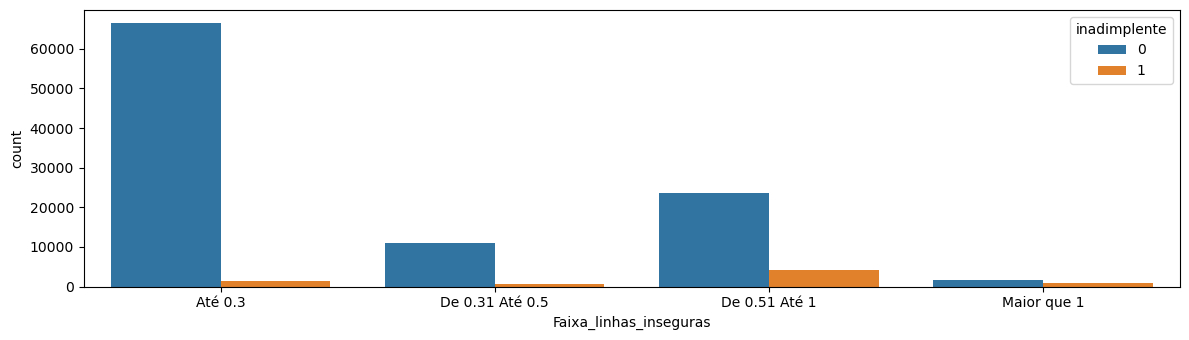

In [38]:
plt.rcParams['figure.figsize'] = [12.00, 3.50]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data= df_dados,x="Faixa_linhas_inseguras",hue = "inadimplente")
plt.show()

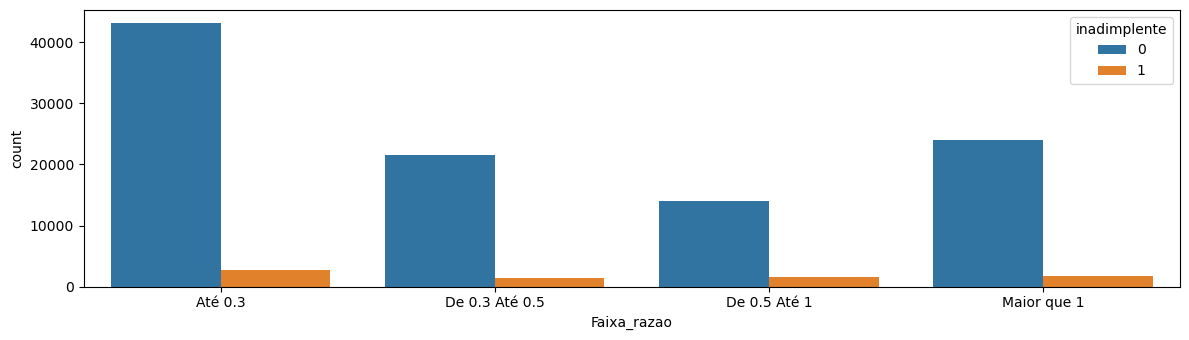

In [39]:
plt.rcParams['figure.figsize'] = [12.00, 3.50]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data= df_dados,x="Faixa_razao",hue = "inadimplente")
plt.show()

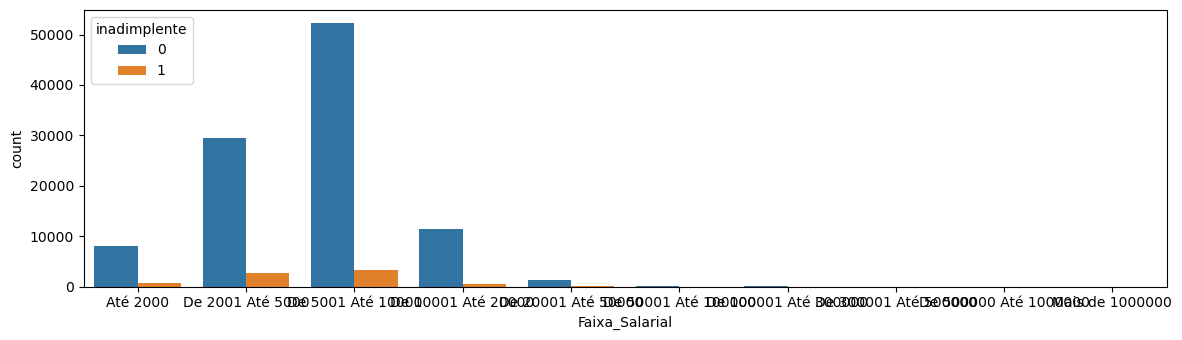

In [40]:
plt.rcParams['figure.figsize'] = [12.00, 3.50]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data= df_dados,x="Faixa_Salarial",hue = "inadimplente")
plt.show()

# Variaveis númericas

In [41]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   inadimplente                           110000 non-null  int64   
 1   Faixa_Salarial                         110000 non-null  category
 2   Faixa_razao                            110000 non-null  category
 3   Faixa_linhas_inseguras                 110000 non-null  category
 4   Faixa_Idade                            110000 non-null  category
 5   Faixa_Linhas_abertas                   110000 non-null  category
 6   numero_de_dependentes                  110000 non-null  float64 
 7   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64   
 8   numero_vezes_passou_90_dias            110000 non-null  int64   
 9   vezes_passou_de_30_59_dias             110000 non-null  int64   
 10  numero_emprestimos_imobiliarios        11000

In [42]:
#Pegando somente variaveis númericas
variaveis_numericas = []
for i in df_dados.columns[0:11].tolist():
    if df_dados.dtypes[i] == "int64" or df_dados.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

In [43]:
#Quantidade de variaveis númericas
len(variaveis_numericas)

6

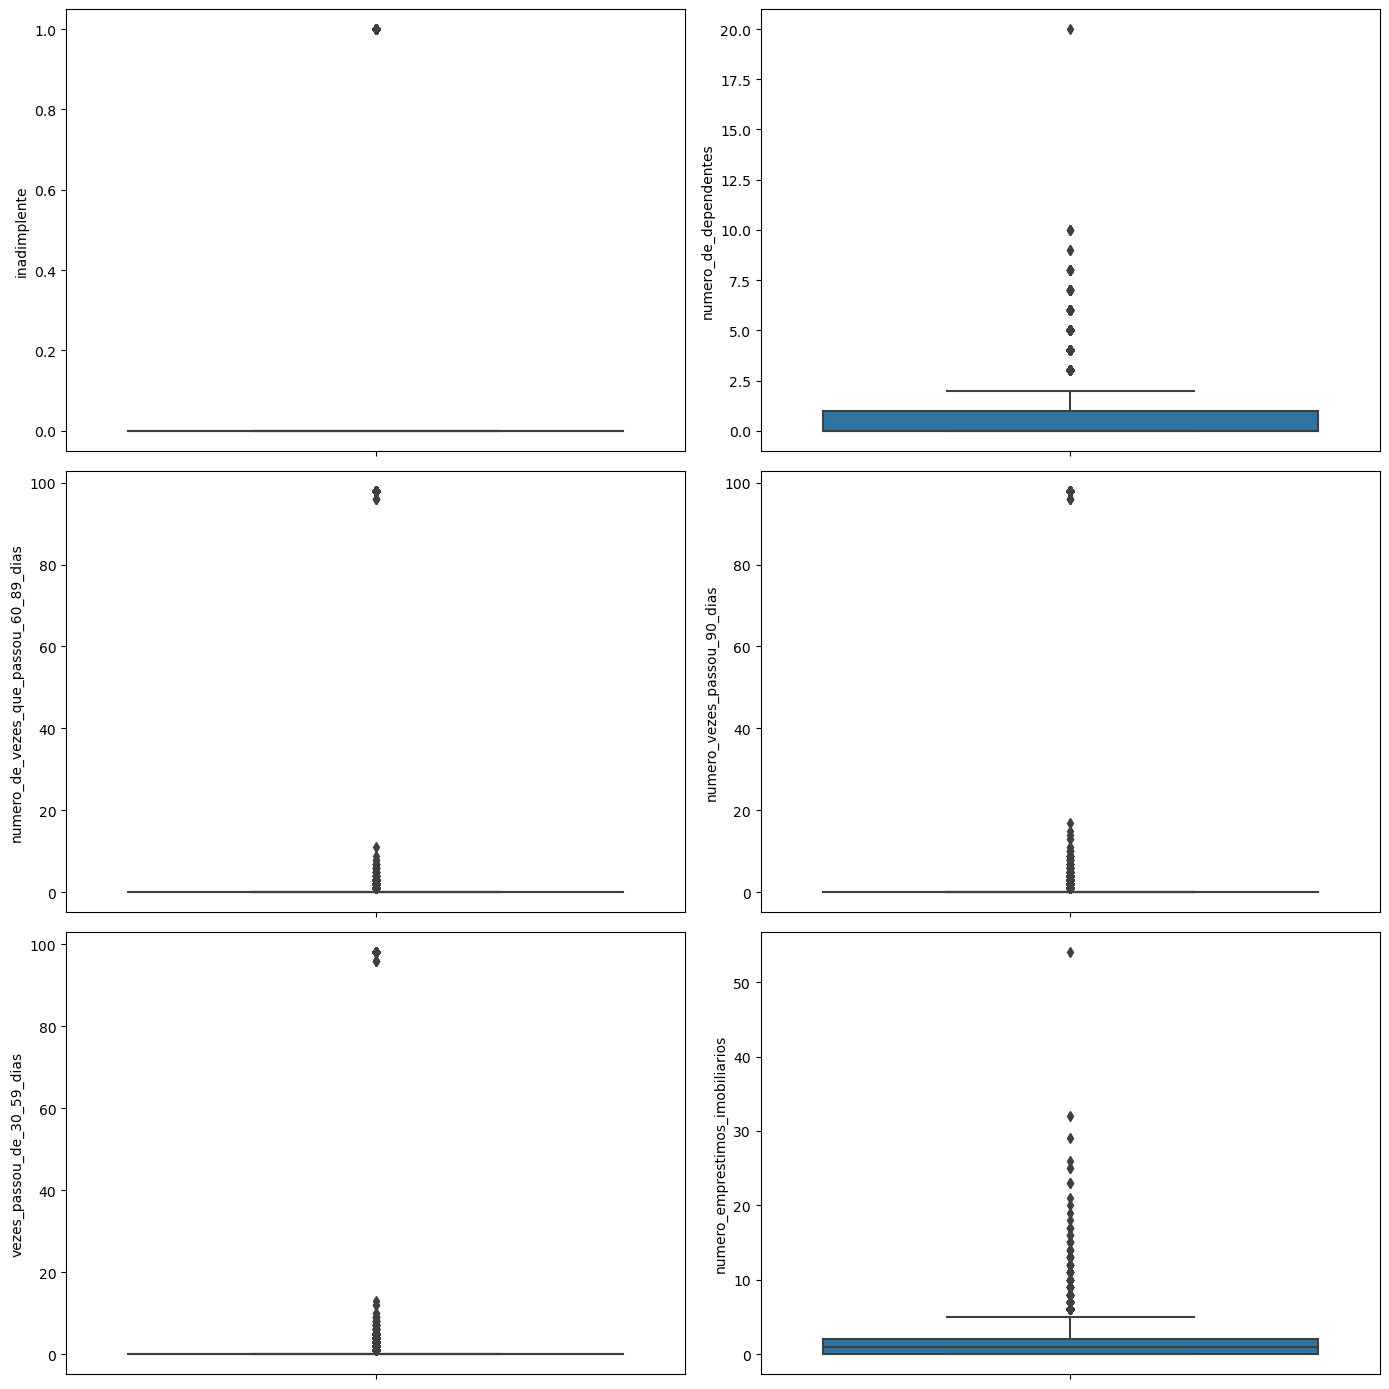

In [44]:
#Vamos avaliar com o blox plot sos outliers para sabermos se iremos trata-los ou não

plt.rcParams['figure.figsize'] = [14.00,14.00]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data=df_dados, y=i, ax=axes[linha][coluna])
    coluna +=1
    if coluna ==2:
        linha += 1
        coluna = 0
plt.show()

In [45]:
# Carregar vairiaveis categoricas, vamos somente retirar a variavel de inadimplente
variaveis_categoricas = []
for i in df_dados.columns[1:11].tolist():
    if df_dados.dtypes[i] == "object" or df_dados.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

In [46]:
#Cria encoder e aplica ONEHOTCODE
#Converter os textos em número
lb= LabelEncoder()
for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [47]:
df_dados.head()

inadimplente  Faixa_Salarial  Faixa_razao  Faixa_linhas_inseguras  \
0             1               8            2                       2   
1             0               4            0                       2   
2             0               4            0                       2   
3             0               4            0                       0   
4             0               7            0                       2   

   Faixa_Idade  Faixa_Linhas_abertas  numero_de_dependentes  \
0            2                     1                    2.0   
1            1                     0                    1.0   
2            1                     0                    0.0   
3            1                     0                    0.0   
4            2                     3                    0.0   

   numero_de_vezes_que_passou_60_89_dias  numero_vezes_passou_90_dias  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            1   
3                                      0                            0   
4                                      0                            0   

   vezes_passou_de_30_59_dias  numero_emprestimos_imobiliarios  
0                           2                                6  
1                           0                                0  
2                           1                                0  
3                           0                                0  
4                           1                                1

In [48]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   Faixa_Salarial                         110000 non-null  int32  
 2   Faixa_razao                            110000 non-null  int32  
 3   Faixa_linhas_inseguras                 110000 non-null  int32  
 4   Faixa_Idade                            110000 non-null  int32  
 5   Faixa_Linhas_abertas                   110000 non-null  int32  
 6   numero_de_dependentes                  110000 non-null  float64
 7   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 8   numero_vezes_passou_90_dias            110000 non-null  int64  
 9   vezes_passou_de_30_59_dias             110000 non-null  int64  
 10  numero_emprestimos_imobiliarios        110000 non-null  

In [49]:
#Visualizando a quantidade da variavell target para balanceamento
variavel_target = df_dados.inadimplente.value_counts()
variavel_target

0    102669
1      7331
Name: inadimplente, dtype: int64

In [50]:
#Separar variaveis preditoras e target
PREDITORAS = df_dados.iloc[:,1:11]
TARGET = df_dados.iloc[:,0]

In [51]:
PREDITORAS.head()

Faixa_Salarial  Faixa_razao  Faixa_linhas_inseguras  Faixa_Idade  \
0               8            2                       2            2   
1               4            0                       2            1   
2               4            0                       2            1   
3               4            0                       0            1   
4               7            0                       2            2   

   Faixa_Linhas_abertas  numero_de_dependentes  \
0                     1                    2.0   
1                     0                    1.0   
2                     0                    0.0   
3                     0                    0.0   
4                     3                    0.0   

   numero_de_vezes_que_passou_60_89_dias  numero_vezes_passou_90_dias  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            1   
3                                      0                            0   
4                                      0                            0   

   vezes_passou_de_30_59_dias  numero_emprestimos_imobiliarios  
0                           2                                6  
1                           0                                0  
2                           1                                0  
3                           0                                0  
4                           1                                1

In [52]:
TARGET.head()

0    1
1    0
2    0
3    0
4    0
Name: inadimplente, dtype: int64

In [53]:


#Cria o balanceador SMOTE
balanceador = SMOTE()

In [54]:
#Criar os dados e equalizar as informações
PREDITORAS_RES,TARGET_RES = balanceador.fit_resample(PREDITORAS,TARGET)

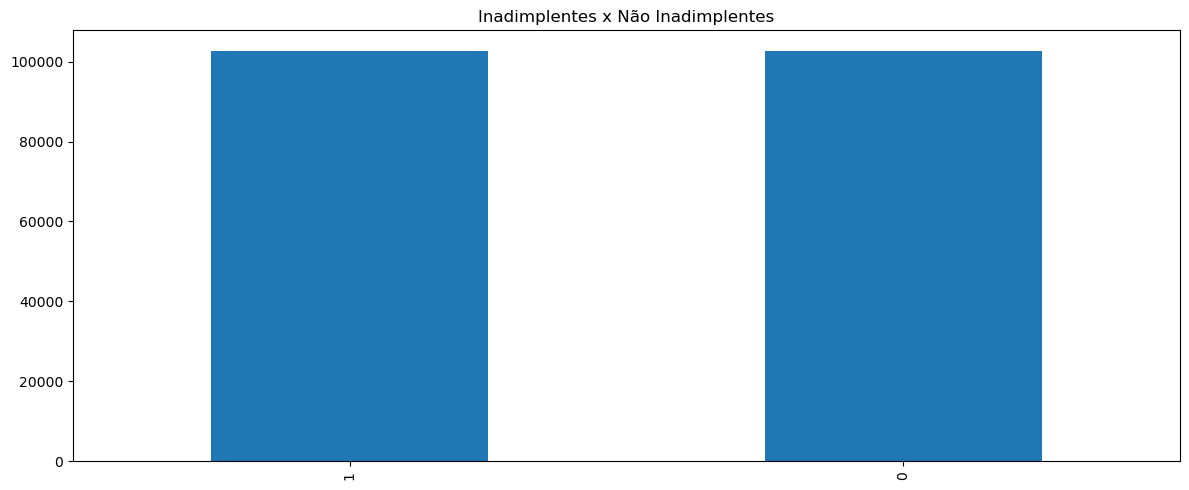

In [55]:
#Visuaizando o balanceamento
plt.rcParams['figure.figsize'] = [12.00, 5]
plt.rcParams['figure.autolayout'] = True
TARGET_RES.value_counts().plot(kind='bar', title='Inadimplentes x Não Inadimplentes')
plt.show()

In [56]:
PREDITORAS_RES.shape

(205338, 10)

In [57]:
TARGET_RES.shape

(205338,)

# Criando modelo de treino

In [315]:
#Dados de Treino, usando 30% dos dados como TREINO
X_treino, X_teste, Y_treino,Y_teste = train_test_split(PREDITORAS_RES,TARGET_RES, test_size=0.3)

In [316]:
#Normalizando as variveis - Pré Processamento dos Dados, Normalização e padronização
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normaizados = Normalizador.transform(X_teste)

In [317]:
X_treino_normalizados.shape

(143736, 10)

In [318]:
X_treino_normalizados

array([[0.44444444, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.44444444, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.66666667, ..., 0.04081633, 0.        ,
        0.        ],
       ...,
       [0.44444444, 0.66666667, 0.66666667, ..., 0.        , 0.01020408,
        0.        ],
       [0.        , 0.66666667, 0.66666667, ..., 0.        , 0.        ,
        0.01851852],
       [0.44444444, 0.33333333, 0.66666667, ..., 0.        , 0.04081633,
        0.01851852]])

In [319]:
# Criando o classificador Random Forest
clf = RandomForestClassifier(n_estimators = 600) # numero de arvores

In [320]:
#Construção do modelo
clf= clf.fit(X_treino_normalizados,Y_treino) # dados de treino normalizados e com a variavel alvo

In [321]:
#Verificando a acuracia no modelo com dados de teste
scores = clf.score(X_teste_normaizados, Y_teste)
scores

0.8394857309827602

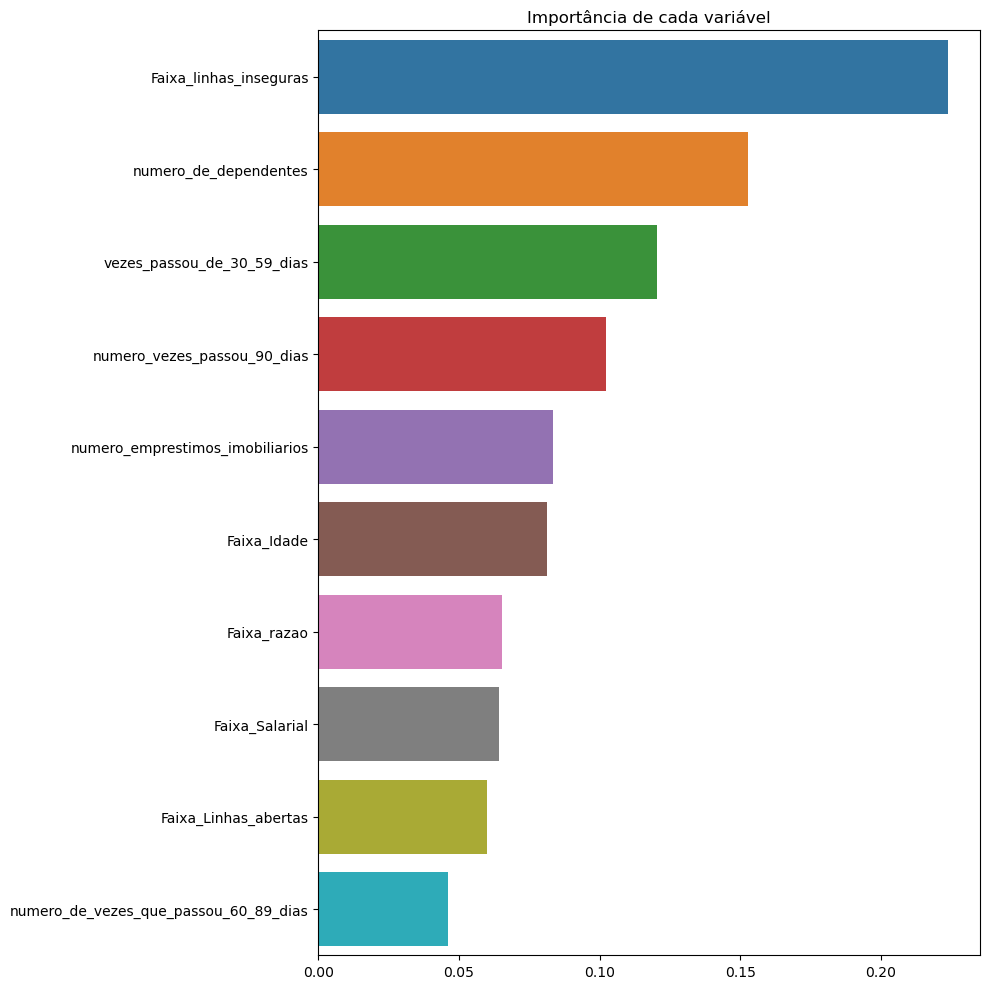

In [322]:
#Avaliando a importância de cada variavel para o modelo de predição 
plt.rcParams["figure.figsize"] = [10.00,10.00]
plt.rcParams['figure.autolayout'] = True
importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [323]:
importances.sort_values(ascending = False)

Faixa_linhas_inseguras                   0.224117
numero_de_dependentes                    0.152937
vezes_passou_de_30_59_dias               0.120578
numero_vezes_passou_90_dias              0.102216
numero_emprestimos_imobiliarios          0.083285
Faixa_Idade                              0.081229
Faixa_razao                              0.065178
Faixa_Salarial                           0.064247
Faixa_Linhas_abertas                     0.059968
numero_de_vezes_que_passou_60_89_dias    0.046244
dtype: float64

In [324]:
# Salvando o modelo criado e treinado
joblib.dump(clf, 'modelo_inadimplente.pk')

['modelo_inadimplente.pk']

In [325]:
#CARREGANDO MODELO
clf = joblib.load('modelo_inadimplente.pk')

# FAZENDO TESTE COM O MODELO

In [326]:
dados = teste.copy()

In [327]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   util_linhas_inseguras                  40000 non-null  float64
 1   idade                                  40000 non-null  int64  
 2   vezes_passou_de_30_59_dias             40000 non-null  int64  
 3   razao_debito                           40000 non-null  float64
 4   salario_mensal                         32032 non-null  float64
 5   numero_linhas_crdto_aberto             40000 non-null  int64  
 6   numero_vezes_passou_90_dias            40000 non-null  int64  
 7   numero_emprestimos_imobiliarios        40000 non-null  int64  
 8   numero_de_vezes_que_passou_60_89_dias  40000 non-null  int64  
 9   numero_de_dependentes                  38954 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.1 MB


In [328]:
# Tratando dados vazios
dados['salario_mensal'].fillna(dados['salario_mensal'].mean(),inplace=True)
dados['numero_de_dependentes'].fillna(int(dados['numero_de_dependentes'].mean()),inplace=True)



dados['salario_mensal'].fillna(dados['salario_mensal'].mean(),inplace=True)
dados['numero_de_dependentes'].fillna(int(dados['numero_de_dependentes'].mean()),inplace=True)

#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categorias para facilitar, nesse caso vamos criar faixas salariais
bins =[-100,2000,5000,10000,20000,50000,100000,300000,500000,1000000,90000000]
labels=['Até 2000', 'De 2001 Até 5000','De 5001 Até 10000','De 10001 Até 20000','De 20001 Até 50000','De 50001 Até 100000','De 100001 Até 300000','De 300001 Até 500000','De 500000 Até 1000000','Mais de 1000000']
dados['Faixa_Salarial'] = pd.cut(dados['salario_mensal'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_Salarial)

#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar razão
bins =[-100,0.3,0.5,1,dados['razao_debito'].max()]
labels= ['Até 0.3','De 0.3 Até 0.5', 'De 0.5 Até 1','Maior que 1']
dados['Faixa_razao'] = pd.cut(dados['razao_debito'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_razao)

#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,0.3,0.5,1,dados['util_linhas_inseguras'].max()]
labels= ['Até 0.3','De 0.31 Até 0.5', 'De 0.51 Até 1','Maior que 1']
dados['Faixa_linhas_inseguras'] = pd.cut(dados['util_linhas_inseguras'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_linhas_inseguras)

#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,20,40,60,80,dados['idade'].max()]
labels= ['Até 20','De 21 Até 40', 'De 41 Até 60','De 61 a 80','Maior que 80']
dados['Faixa_Idade'] = pd.cut(dados['idade'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_Idade)

#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,5,10,20,30,dados['numero_linhas_crdto_aberto'].max()]
labels= ['Até 5','De 6 Até 10', 'De 11 Até 20','De 21 a 30','Maior que 30']
dados['Faixa_Linhas_abertas'] = pd.cut(dados['numero_linhas_crdto_aberto'], bins=bins,labels=labels)
pd.value_counts(dados.Faixa_Linhas_abertas)

#Vamos agora selecionar somente as colunas que desejo utilizar no modelo preditivo

colunas = ['Faixa_Salarial','Faixa_razao',
           'Faixa_linhas_inseguras','Faixa_Idade',
          'Faixa_Linhas_abertas','numero_de_dependentes',
           'numero_de_vezes_que_passou_60_89_dias','numero_vezes_passou_90_dias',
          'vezes_passou_de_30_59_dias','numero_emprestimos_imobiliarios']
df_dados=pd.DataFrame(dados, columns=colunas)





In [329]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Faixa_Salarial                         40000 non-null  category
 1   Faixa_razao                            40000 non-null  category
 2   Faixa_linhas_inseguras                 40000 non-null  category
 3   Faixa_Idade                            40000 non-null  category
 4   Faixa_Linhas_abertas                   40000 non-null  category
 5   numero_de_dependentes                  40000 non-null  float64 
 6   numero_de_vezes_que_passou_60_89_dias  40000 non-null  int64   
 7   numero_vezes_passou_90_dias            40000 non-null  int64   
 8   vezes_passou_de_30_59_dias             40000 non-null  int64   
 9   numero_emprestimos_imobiliarios        40000 non-null  int64   
dtypes: category(5), float64(1), int64(4)
memory usage: 1.7 MB


In [330]:
# carregar variaveis categoricas para OneHotEncoding
# Carregar vairiaveis categoricas, vamos somente retirar a variavel de inadimplente
variaveis_categoricas = []
for i in df_dados.columns[0:10].tolist():
    if df_dados.dtypes[i] == "object" or df_dados.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

lb= LabelEncoder()
for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])



# Separar variaveis preditoras
PREDITORAS = df_dados.iloc[:,0:10]    
    

# Fazendo a normalização dos dados    
Normalizador = MinMaxScaler()
dados_normalizados = Normalizador.fit_transform(PREDITORAS)

# Fazendo previsões dos dados de teste

previsoes = clf.predict(dados_normalizados)
probabilidades = clf.predict_proba(dados_normalizados)
dados['PREVISOES'] = previsoes
dados['PREVISOES'] = dados['PREVISOES'].apply(lambda x:"RISCO DE INADIPLENCIA" if x ==1 else "ELEGIVEL")
dados['PROBABILIDADES'] = probabilidades[:, 1]
dados.head()

util_linhas_inseguras  idade  vezes_passou_de_30_59_dias  razao_debito  \
0               0.025849     62                           0      0.081775   
1               0.667083     55                           0      0.153112   
2               0.007093     44                           0      0.148800   
3               0.091213     54                           0      0.351635   
4               0.112680     54                           0      0.065959   

   salario_mensal  numero_linhas_crdto_aberto  numero_vezes_passou_90_dias  \
0          8180.0                           3                            0   
1          2200.0                           3                            0   
2          7499.0                          20                            0   
3          5900.0                          15                            0   
4          2167.0                           3                            0   

   numero_emprestimos_imobiliarios  numero_de_vezes_que_passou_60_89_dias  \
0                                2                                      0   
1                                0                                      0   
2                                1                                      0   
3                                1                                      1   
4                                0                                      0   

   numero_de_dependentes     Faixa_Salarial     Faixa_razao  \
0                    0.0  De 5001 Até 10000         Até 0.3   
1                    0.0   De 2001 Até 5000         Até 0.3   
2                    0.0  De 5001 Até 10000         Até 0.3   
3                    0.0  De 5001 Até 10000  De 0.3 Até 0.5   
4                    0.0   De 2001 Até 5000         Até 0.3   

  Faixa_linhas_inseguras   Faixa_Idade Faixa_Linhas_abertas  \
0                Até 0.3    De 61 a 80                Até 5   
1          De 0.51 Até 1  De 41 Até 60                Até 5   
2                Até 0.3  De 41 Até 60         De 11 Até 20   
3                Até 0.3  De 41 Até 60         De 11 Até 20   
4                Até 0.3  De 41 Até 60                Até 5   

               PREVISOES  PROBABILIDADES  
0               ELEGIVEL        0.030294  
1  RISCO DE INADIPLENCIA        0.586100  
2               ELEGIVEL        0.000000  
3               ELEGIVEL        0.097101  
4               ELEGIVEL        0.171325

In [331]:
dados.to_csv('teste_FINAL.csv', index=False)